In [1]:
import ipynb_setup

from src.data_loader.data_loader import Dataset

from src.model.catboost_model import CatBoost
from src.model.adaboost import AdaBoost
from src.model.extra_tree import ExtraTree
from src.model.lgbm import LGBM
from src.model.xgb import XGB

In [2]:
CATEGORICAL_FEATURES = ['Condition', 'Clouds', 'Day/Night', 'Snow_Priority']
dataset = Dataset('../data/processed/merged_data_2.csv', CATEGORICAL_FEATURES)
x, x_test, y, y_test = dataset.clean_and_encode_data()

/home/djordje/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Creating ordinal representations of circular features (Month/Year/Weekday/Minute)
Columns: ['FeelsLike', 'Precip.', 'StreetWidth_Min', 'POSTED_SPEED', 'Number_Travel_Lanes', 'Number_Park_Lanes', 'Number_Total_Lanes', 'LL_X', 'LL_Y', 'LL_Z', 'HOUR_SIN', 'HOUR_COS', 'MONTH_SIN', 'MONTH_COS', 'DOW_SIN', 'DOW_COS', 'Condition_CLD', 'Condition_LVS', 'Condition_RD', 'Clouds_BKN', 'Clouds_CLR', 'Clouds_FEW', 'Clouds_OVC', 'Clouds_SCT', 'Day/Night_D', 'Day/Night_N', 'Snow_Priority_C', 'Snow_Priority_H', 'Snow_Priority_S', 'Snow_Priority_V']


In [3]:
cat = CatBoost(auto_class_weights='Balanced', iterations=400, learning_rate=0.6,
               l2_leaf_reg=3.5, depth=4, rsm=0.98, verbose=50,)
ada = AdaBoost(n_estimators=200)
extra_tree = ExtraTree(n_estimators=300, bootstrap=True,
                       oob_score=True, n_jobs=-1,
                       class_weight='balanced',
                       min_samples_leaf=250,
                       verbose=1,)
lgbm = LGBM(num_class=2, boosting='gbdt', learning_rate=0.7, n_estimators=120,
            num_leaves=110, objective='multiclass', random_state=42,
            class_weight='balanced', verbose=50,)

In [4]:
cat.fit(x, y)
ada.fit(x, y)
extra_tree.fit(x, y)
lgbm.fit(x, y)

Training loop started [Tue Apr 27 19:52:09 2021]
0:	learn: 0.6840110	total: 198ms	remaining: 1m 18s
50:	learn: 0.6717232	total: 8.07s	remaining: 55.2s
100:	learn: 0.6687979	total: 17s	remaining: 50.2s
150:	learn: 0.6668058	total: 25.6s	remaining: 42.3s
200:	learn: 0.6650889	total: 32.9s	remaining: 32.6s
250:	learn: 0.6635705	total: 39.7s	remaining: 23.5s
300:	learn: 0.6621292	total: 50.4s	remaining: 16.6s
350:	learn: 0.6607266	total: 1m	remaining: 8.49s
399:	learn: 0.6593722	total: 1m 11s	remaining: 0us
Training loop ended [Tue Apr 27 19:53:22 2021]
Training loop started [Tue Apr 27 19:53:22 2021]
Training loop ended [Tue Apr 27 19:56:21 2021]
Training loop started [Tue Apr 27 19:56:21 2021]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.9min finished


Training loop ended [Tue Apr 27 19:58:38 2021]
Training loop started [Tue Apr 27 19:58:38 2021]
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt


LightGBMError: Number of classes should be specified and greater than 1 for multiclass training

In [6]:
cat.classification_report(x_test, y_test)

Accuracy: 
 0.5717549582283882 
 F1: 
 0.5717549582283882 
 F1_2: 
 0.6181202338748345 
 Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.56      0.68     58912
           1       0.25      0.61      0.35     13745

    accuracy                           0.57     72657
   macro avg       0.55      0.59      0.52     72657
weighted avg       0.75      0.57      0.62     72657



In [7]:
ada.classification_report(x_test, y_test)

Accuracy: 
 0.5573860742942869 
 F1: 
 0.5573860742942869 
 F1_2: 
 0.6051593675293424 
 Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.55      0.67     58912
           1       0.24      0.61      0.34     13745

    accuracy                           0.56     72657
   macro avg       0.55      0.58      0.50     72657
weighted avg       0.74      0.56      0.61     72657



In [8]:
extra_tree.classification_report(x_test, y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    2.1s finished


Accuracy: 
 0.5685068197145492 
 F1: 
 0.5685068197145492 
 F1_2: 
 0.6152449094228932 
 Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.57      0.68     58912
           1       0.23      0.57      0.33     13745

    accuracy                           0.57     72657
   macro avg       0.54      0.57      0.51     72657
weighted avg       0.73      0.57      0.62     72657



In [9]:
lgbm.classification_report(x_test, y_test)


ValueError: Found input variables with inconsistent numbers of samples: [72657, 2]

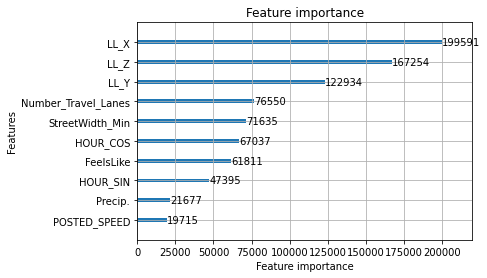

In [10]:
cat.feature_importance(x_test)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

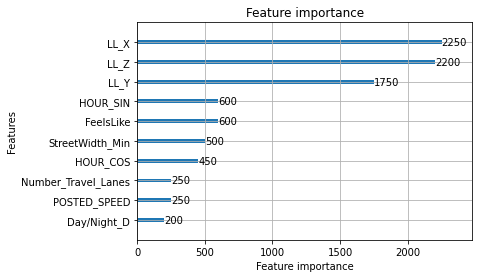

In [11]:
ada.feature_importance(x_test)

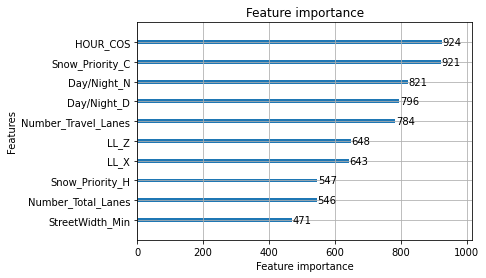

In [12]:
extra_tree.feature_importance(x_test)

In [14]:
lgbm.feature_importance()

TypeError: plot_importance() missing 1 required positional argument: 'feature_name'

ENSAMBLE

In [15]:
from sklearn.metrics import f1_score, accuracy_score, classification_report

# best perfoming models
p1 = cat.model.predict_proba(x_test)
#p2 = lgbm.model.predict_proba(x_test)
p3 = extra_tree.model.predict_proba(x_test)
p4 = ada.model.predict_proba(x_test)

prediction = (p1  + p3 + p4)/3
prediction = prediction.argmax(axis=1)

accuracy = accuracy_score(y_test, prediction)
f1 = f1_score(y_test, prediction, average='micro')
f1_2 = f1_score(y_test, prediction, average='weighted')
report = classification_report(y_test, prediction)

print(f'Accuracy: \n {accuracy} \n F1: \n {f1} \n F1_2: \n {f1_2} \n Classification report: \n {report}')




[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    1.6s finished


Accuracy: 
 0.5770538282615577 
 F1: 
 0.5770538282615577 
 F1_2: 
 0.6228805541646812 
 Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.57      0.69     58912
           1       0.25      0.60      0.35     13745

    accuracy                           0.58     72657
   macro avg       0.55      0.59      0.52     72657
weighted avg       0.74      0.58      0.62     72657

